# Actividad Regresión Logística

## Parte 1

Elaborar un modelo de regression logística utilizando los datos de aceptación o no en una posgrado.
Cargar el documento “grad.csv” que cuenta con las siguientes columnas:
Admit .- Si el postulante fue admitido o no
Gpa.- Calificación en nivel superior
Gre.- Calificación en el examen de admisión
Rank.- Prestigio de la universidad de origen
Utilizar las últimas tres variables para predecir si un estudiante será aceptado.
Analizar los estadísticos descriptivos de las variables.
Utilizar Seaborn para construir un gráfico de admisión vs rank
https://seaborn.pydata.org/examples/faceted_histogram.html 

In [3]:
#imports
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data=pd.read_csv("grad.csv")

In [5]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


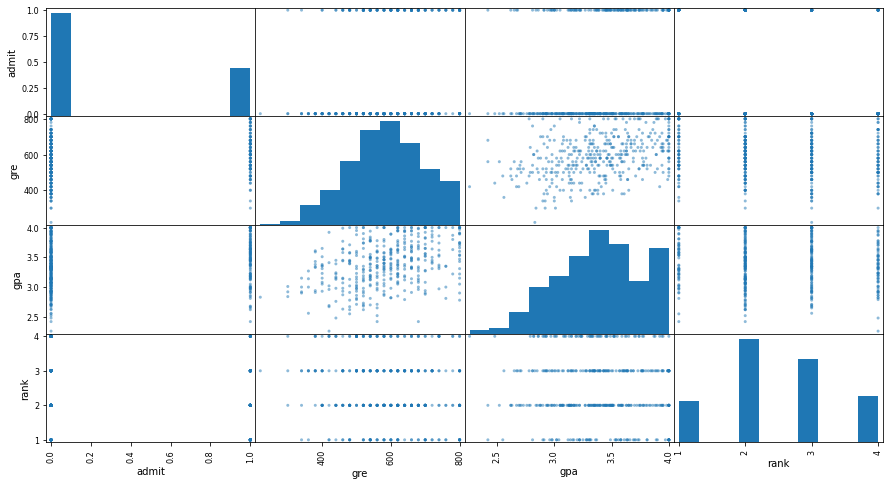

In [7]:
s_matrix = pd.plotting.scatter_matrix(data, alpha = 0.5, figsize=(15,8));

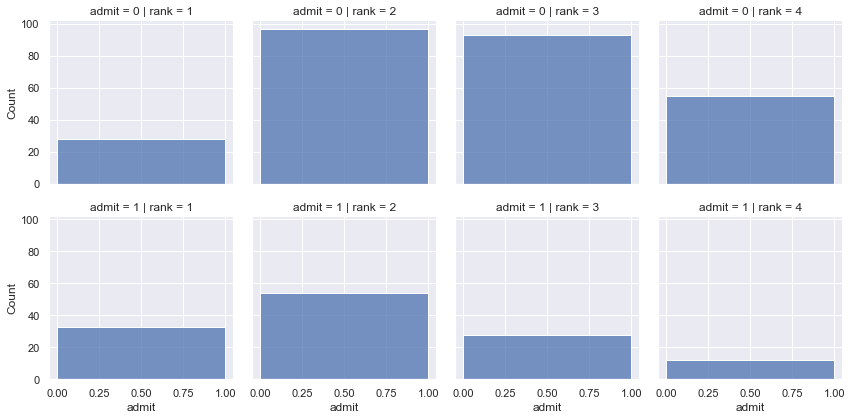

In [19]:
#Gráfico Admit vs rank
sns.set_theme(style="darkgrid")
sns.displot(
    data, x="admit", col="rank", row="admit",
    binwidth=1, height=3, kind="hist")

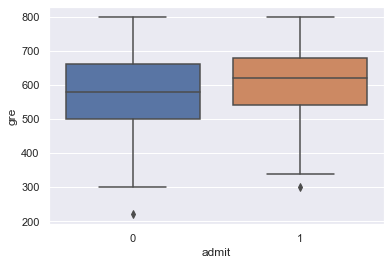

In [22]:
#Crear un gráfico de caja comparando admit vs GRE
sns.boxplot(data=data, x="admit", y="gre");

## Parte 2

- Dividir los datos en conjuntos de entrenamiento y prueba
- Construir un modelo de Regresión logística utilizando una Validación cruzada 5 veces.
- Calcular el accuracy, precision y recall (solo para validacón). Consultar sklearn y crear un dataframe 

In [25]:
X=data.drop(['admit'], axis=1)
X

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


In [26]:
y=data["admit"]
y

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

In [27]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, RocCurveDisplay

In [29]:
#validación cruzada
n_folds=5
random_seed=0
kf= KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
accuracy, precision, recall= np.empty(n_folds), np.empty(n_folds), np.empty(n_folds)

X_train2= np.array(X_train)
y_train2= np.array(y_train)

for j, (t_index, v_index) in enumerate(kf.split(X_train2)): #indice de entrenamiento y de prueba/validación
    X_tr=X_train2[t_index]
    y_tr=y_train2[t_index]
    X_v=X_train2[v_index]
    y_v=y_train2[v_index]
    
    model=LogisticRegression()
    model.fit(X_tr, y_tr)
    
    #train 
    y_tr_pred= model.predict(X_tr)
    
    #test 
    y_v_pred= model.predict(X_v)
    
    accuracy[j]=accuracy_score(y_v, y_v_pred)
    precision[j]=precision_score(y_v, y_v_pred)
    recall[j]=recall_score(y_v, y_v_pred)

In [30]:
df=pd.DataFrame({'Accuracy':accuracy, 'Precision':precision, 'Recall':recall})
df

,Accuracy,Precision,Recall
0,0.839286,1.000000,0.400000
1,0.571429,0.111111,0.058824
2,0.660714,0.300000,0.200000
3,0.660714,0.800000,0.181818
4,0.660714,0.666667,0.100000


- Transformar la variable “rank” de tipo ordinal, en categórica por medio de get_dummies.
- Calcular de nuevo  el accuracy, precision y recall para almacenarlo como dataframe. ¿Este modelo tuvo un major rendimiento?
- Continuar utilizando el mejor modelo.
- Crear un gráfico con la curva ROC que incluya AUC y etiquetas.

In [32]:
data2=pd.get_dummies(data, columns=['rank'])
data2.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [33]:
X=data2.drop(['admit'], axis=1)
y=data2['admit']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=1)

In [35]:
n_folds=5
random_seed=0
kf= KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
accuracy, precision, recall= np.empty(n_folds), np.empty(n_folds), np.empty(n_folds)

X_train3= np.array(X_train)
y_train3= np.array(y_train)

for j, (t_index, v_index) in enumerate(kf.split(X_train3)): #indice de entrenamiento y de prueba/validación
    X_tr=X_train3[t_index]
    y_tr=y_train3[t_index]
    X_v=X_train3[v_index]
    y_v=y_train3[v_index]
    
    model=LogisticRegression(max_iter=10000)
    model.fit(X_tr, y_tr)
    
    #train 
    y_tr_pred= model.predict(X_tr)
    
    #test 
    y_v_pred= model.predict(X_v)
    
    accuracy[j]=accuracy_score(y_v, y_v_pred)
    precision[j]=precision_score(y_v, y_v_pred)
    recall[j]=recall_score(y_v, y_v_pred)

In [36]:
df2=pd.DataFrame({'Accuracy':accuracy, 'Precision':precision, 'Recall':recall})
df2

,Accuracy,Precision,Recall
0,0.767857,1.000000,0.133333
1,0.571429,0.111111,0.058824
2,0.642857,0.222222,0.133333
3,0.625000,0.666667,0.090909
4,0.642857,0.500000,0.150000


In [38]:
#comparación
df.mean()

Accuracy     0.678571
Precision    0.575556
Recall       0.188128
dtype: float64

In [39]:
df2.mean()

Accuracy     0.65000
Precision    0.50000
Recall       0.11328
dtype: float64

In [40]:
#Se puede observar que el primer modelo es mejor, por lo que no utilizaremos el dataframe con dummies de 'rank'
#Se define de nuevo X, y, grupos de entrenamiento y prueba.

In [41]:
X=data.drop(['admit'], axis=1)
y=data['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=1)

In [42]:
model=LogisticRegression()
y_model=model.fit(X_train, y_train).predict_proba(X_test) #probabilidad de 0 y 1
y_hat=y_model[::,1]

In [43]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_hat) # tenga en cuenta que estamos anotando en nuestros datos de entrenamiento!

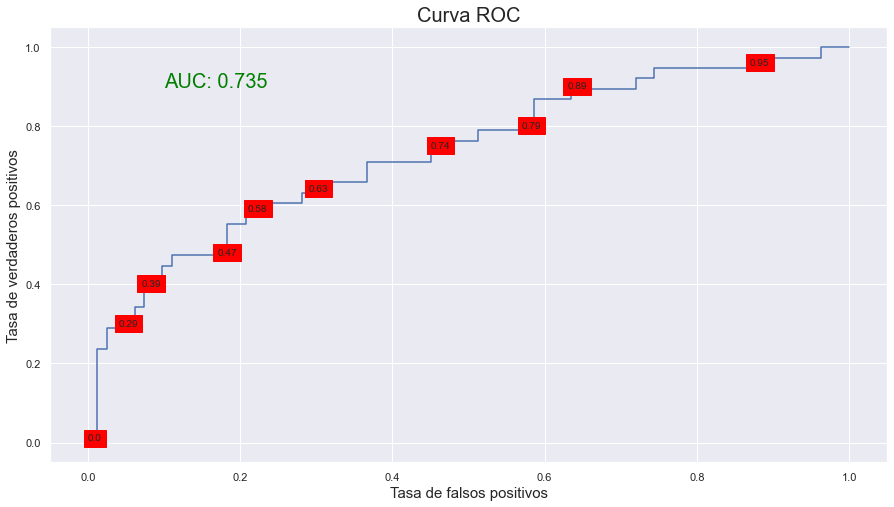

In [54]:
# Gráfica de ROC
fig = plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='AUC', color='b')
plt.xlabel("Tasa de falsos positivos", fontsize=15)
plt.ylabel("Tasa de verdaderos positivos", fontsize=15)
plt.title("Curva ROC", fontsize=20)
plt.text(0.1, 0.9, " ".join(["AUC:",str(auc.round(3))]), fontsize=20, color='green')
for index in range(0,len(fpr),5):
  plt.text(round(fpr[index],2), round(tpr[index],2), round(tpr[index],2), size=10, backgroundcolor='red', 
  verticalalignment='bottom')
plt.show()

El gráfico comprueba que es posible seleccionar un umbral en el que la tasa de verdaderos positivos sea mayor a 60% y la tasa de falsos positivos sea menor a 40%.

## Parte 3

Escribir una función para construer una curva ROC y que devuelva como listas la Tasa de Verdaderos Positivos, Tasa de Verdaderos Negativos y los Umbrales.

In [56]:
from sklearn.datasets import make_classification

In [57]:
def roc_curve(y_model, probs):
    thresholds=np.linspace(0,1,50).tolist()
    y_hat=probs[::,1]
    fpr, tpr, _= metrics.roc_curve(y_model, y_hat)
    return fpr, tpr, thresholds

In [58]:
data2=pd.read_csv('loanf.csv')
data2.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [59]:
data2["Menor a 12%"]=np.where(data2["Interest.Rate"] < 12, 1, 0)
data2.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,Menor a 12%
6,15.31,670,36,4891.67,6000,0
11,19.72,670,36,3575.00,2000,0
12,14.27,665,36,4250.00,10625,0
13,21.67,670,60,14166.67,28000,0
21,21.98,665,36,6666.67,22000,0


In [60]:
X=data2[['FICO.Score','Loan.Length','Loan.Amount']]
y=data2['Menor a 12%']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=1)

In [62]:
model=LogisticRegression()
model.fit(X_train, y_train)
yprob=model.predict_proba(X_test)

In [63]:
fpr, tpr, thresholds= roc_curve(probs=yprob, y_model=y_test)

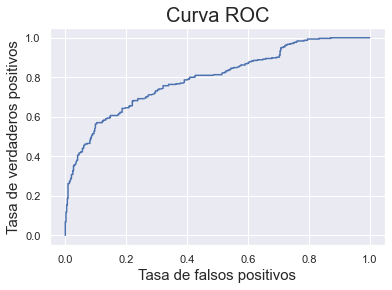

In [64]:
plt.plot(fpr, tpr)
plt.xlabel("Tasa de falsos positivos", fontsize=15)
plt.ylabel("Tasa de verdaderos positivos", fontsize=15)
plt.title("Curva ROC", fontsize=20)
plt.show()

In [65]:
y_hat.mean()

0.34834696352497463